# Synthesizing a Gaussian Mixture Model (GMM) dataset
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

Gaussian mixture models are a probabilistic model for representing normally distributed subpopulations within an overall population. Mixture models in general don't require knowing which subpopulation a data point belongs to, allowing the model to learn the subpopulations automatically. Since subpopulation assignment is not known, this constitutes a form of unsupervised learning.

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

### The generating function

In [2]:
def gen_GMM(N=1000,n_comp=3, mu=[-1,0,1],sigma=[1,1,1],mult=[1,1,1]):
    """
    Generates a Gaussian mixture model data, from a given list of Gaussian components
    N: Number of total samples (data points)
    n_comp: Number of Gaussian components
    mu: List of mean values of the Gaussian components
    sigma: List of sigma (std. dev) values of the Gaussian components
    mult: (Optional) list of multiplier for the Gaussian components
    """
    assert n_comp == len(mu), "The length of the list of mean values does not match number of Gaussian components"
    assert n_comp == len(sigma), "The length of the list of sigma values does not match number of Gaussian components"
    assert n_comp == len(mult), "The length of the list of multiplier values does not match number of Gaussian components"
    rand_samples = []
    for i in range(N):
        pivot = random.uniform(0,n_comp)
        j = int(pivot)
        rand_samples.append(mult[j]*random.gauss(mu[j],sigma[j]))
        
    return np.array(rand_samples)

### Testing the function including `AssertionError`

In [3]:
gen_GMM(10)

array([-0.69350334,  0.36658481,  0.86296216,  0.46916309, -1.81498449,
       -0.38003292,  2.1746676 ,  2.80926384,  0.86725979, -1.9510985 ])

In [4]:
gen_GMM(N=10,n_comp=4,mu=[1,2,0],sigma=[1,1,1,2])

AssertionError: The length of the list of mean values does not match number of Gaussian components

In [5]:
gen_GMM(N=10,n_comp=4,mu=[1,2,0,-1],sigma=[1,1,2])

AssertionError: The length of the list of sigma values does not match number of Gaussian components

### Data and plot examples

In [6]:
data = gen_GMM(N=100,mu=[-6,0,6])

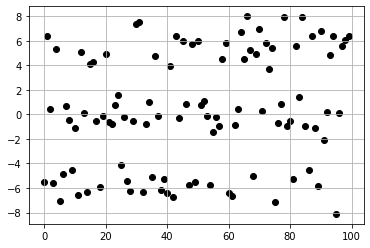

In [7]:
plt.scatter(x=np.arange(100),y=data,color='k')
plt.grid(True)
plt.show()

In [8]:
data = gen_GMM(N=10000,mu=[-6,0,6])

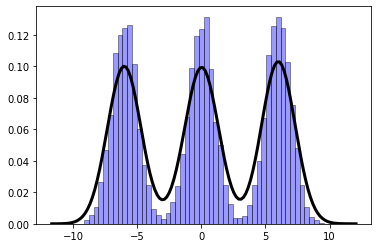

In [9]:
sns.distplot(data,bins=50,hist_kws={'color':'blue','edgecolor':'k'},kde_kws={'lw':3,'color':'k'})
plt.show()

In [10]:
data = gen_GMM(N=10000,mu=[-3,0,3])

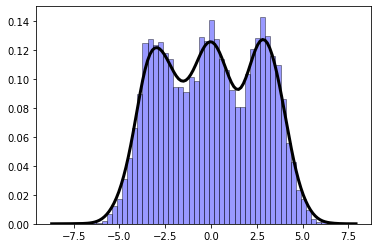

In [11]:
sns.distplot(data,bins=50,hist_kws={'color':'blue','edgecolor':'k'},kde_kws={'lw':3,'color':'k'})
plt.show()

In [12]:
data = gen_GMM(N=10000,mu=[-5,0,5],sigma=[1,2,1.5])

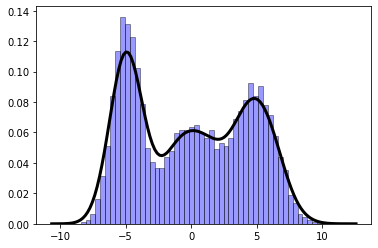

In [13]:
sns.distplot(data,bins=50,hist_kws={'color':'blue','edgecolor':'k'},kde_kws={'lw':3,'color':'k'})
plt.show()

In [14]:
data = gen_GMM(N=10000,mu=[-5,0,5],sigma=[1.8,0.3,1.1],mult=[0.7,1.8,1.1])

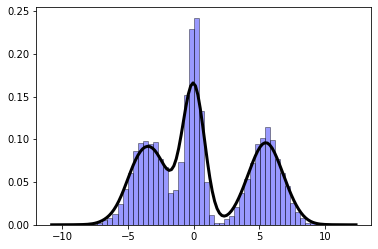

In [15]:
sns.distplot(data,bins=50,hist_kws={'color':'blue','edgecolor':'k'},kde_kws={'lw':3,'color':'k'})
plt.show()